<a href="https://colab.research.google.com/github/MariaShaiina/Marathon_DL_SSAU_2023/blob/main/Lab8/Lab8_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Лабораторная работа №8**
### Обучение 3х-слойной сети на реальных данных

Шаина Мария гр. 6231-010402D

In [ ]:
from keras.datasets import mnist
from keras.utils import to_categorical

import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

Набор MNIST - это большая коллекция рукописных цифр. MNIST содержит коллекцию из  70 000 изображений (60 000 на обучающей и 10 000 на тестовой) 28 x 28  рукописных цифр от  0 до 9. Набор данных уже разделен на наборы для обучения и тестирования.

In [ ]:
#loading the dataset
(train_X, train_y), (test_X, test_y) = mnist.load_data()

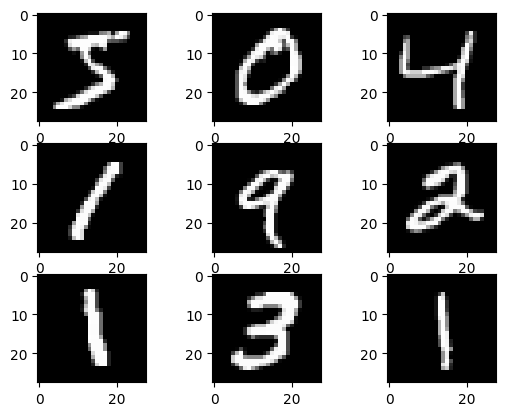

In [ ]:
for i in range(9):
  plt.subplot(330 + 1 + i)
  plt.imshow(train_X[i], cmap=plt.get_cmap('gray'))

Проверим на сбалансированность классов

In [ ]:
unique, counts = np.unique(train_y, return_counts=True)
class_counts = dict(zip(unique, counts))

print("Class Counts:", class_counts)

Class Counts: {0: 5923, 1: 6742, 2: 5958, 3: 6131, 4: 5842, 5: 5421, 6: 5918, 7: 6265, 8: 5851, 9: 5949}


Видим, что значений в классах примерно одинаково

Нормализация данных

In [ ]:
# Приведение картинок к 784-размерным векторам и нормализация значений пикселей (0, 1)
X_train_vec = train_X.reshape((-1, 28*28)) / 255
X_test_vec = test_X.reshape((-1, 28*28)) / 255

Определение меток класса

In [ ]:
# Применение one-hot кодирования
train_y = to_categorical(train_y, num_classes=10)

print("Test Original Labels:")
print(test_y)

test_y = to_categorical(test_y, num_classes=10)
print("\nTest One-Hot Encoded Labels:")
print(test_y)

Test Original Labels:
[7 2 1 ... 4 5 6]

Test One-Hot Encoded Labels:
[[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


Обучение сети

ReLU обеспечивает нелинейность и активацию на скрытых слоях, а Softmax преобразует необработанные выходы в вероятностное распределение по классам на выходе сети.

В качестве функии ошибки использутся перекрестная энтропия

In [ ]:
# Rectified Linear Unit (ReLU)
def ReLU(x):
   return np.maximum(0, x) #return x * (x >= 0)
#Производная ReLU
def dReLU(x):
  return 1. * (x > 0)

# Функция softmax для выходного слоя
def softmax(x):
    exp_values = np.exp(x - np.max(x, axis=1, keepdims=True))
    return exp_values / np.sum(exp_values, axis=1, keepdims=True)


def model_prediction(input, weights_0_1, weights_1_2):
  #forward pass
  layer_0 = input
  layer_1 = ReLU(np.dot(layer_0,weights_0_1))
  layer_2 = np.dot(layer_1,weights_1_2)
  return layer_2

Обучение с помощью стохастического градиентного спуска

In [ ]:
np.random.seed(1)  # constant random values ​​during experimentation

# Создаем списки для хранения значений ошибки и точности на каждой итерации
train_accuracy_hist = []
train_error_hist = []
iteration_hist = []

# Определение гиперпараметров
learning_rate = 0.005
hidden_size = 40
input_size = X_train_vec.shape[1]  # 784
num_labels = train_y.shape[1]  # 10
iterations = 6

weights_0_1 = (2 * np.random.random((input_size, hidden_size)) - 1) / np.sqrt(input_size)  # веса между входным и скрытым слоями
weights_1_2 = (2 * np.random.random((hidden_size, num_labels)) - 1) / np.sqrt(hidden_size)  # веса между скрытым и выходным слоями

for iteration in range(iterations):
    error = 0
    for i in range(len(X_train_vec[:1000])): #обновление весов для каждого пример
        # forward pass
        layer_0 = X_train_vec[i:i + 1]
        layer_1 = ReLU(np.dot(layer_0, weights_0_1))
        layer_2 = np.dot(layer_1, weights_1_2)

        error += np.sum((layer_2 - train_y[i:i + 1]) ** 2)

        # backward pass
        layer_2_delta = 2 * (layer_2 - train_y[i:i + 1])
        weight_1_2_corrections = layer_1.T.dot(layer_2_delta)  # величина коррекции для весов между layer_1 и layer_2

        layer_1_delta = layer_2_delta.dot(weights_1_2.T) * dReLU(layer_1)
        weight_0_1_corrections = layer_0.T.dot(layer_1_delta)

        weights_1_2 -= learning_rate * weight_1_2_corrections
        weights_0_1 -= learning_rate * weight_0_1_corrections

    if (iteration % 2 == 0):
      train_error_hist.append(error)
      iteration_hist.append(iteration)
      goal_idx = np.argmax(train_y[:100], axis=1)
      y_pred = model_prediction(X_train_vec[:100], weights_0_1, weights_1_2)
      pred_idx = np.argmax(y_pred, axis=1)
      acc = accuracy_score(goal_idx, pred_idx)
      train_accuracy_hist.append(acc)
      print(f"Iteration {iteration + 1} \nError: {str(error)} \nАcc: {str(acc)}")
      print()


Iteration 1 
Error: 586.0211177268972 
Аcc: 0.84

Iteration 3 
Error: 287.5259916825811 
Аcc: 0.93

Iteration 5 
Error: 205.70503803838992 
Аcc: 0.95



Постройте графики функции потерь и accuracy на обучающей выборке

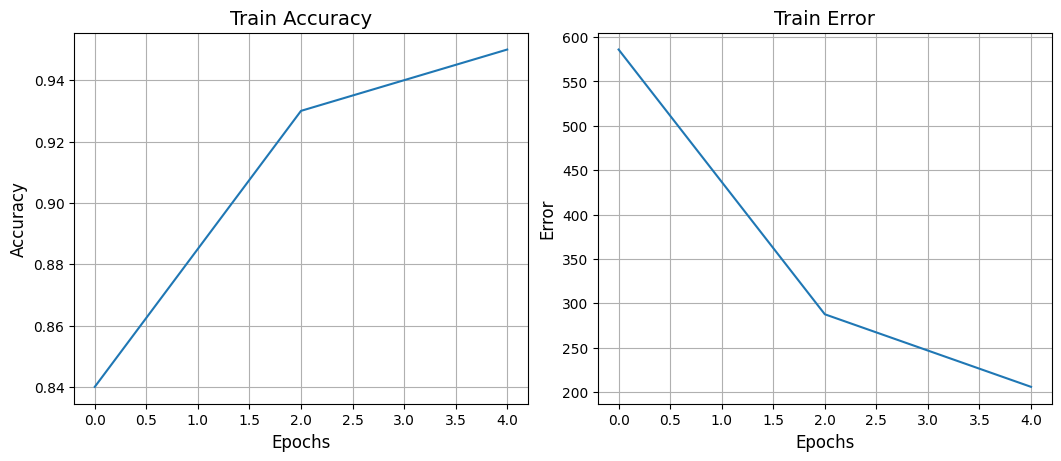

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(10.5, 4.5), constrained_layout=True)

error_range = np.linspace(0.15, 0)

ax[0].set_title('Train Accuracy', size=14)
ax[0].set_xlabel('Epochs', size=12)
ax[0].set_ylabel('Accuracy', size=12)
ax[1].set_title('Train Error', size=14)
ax[1].set_xlabel('Epochs', size=12)
ax[1].set_ylabel('Error', size=12)

ax[0].plot(iteration_hist, train_accuracy_hist)
ax[1].plot(iteration_hist, train_error_hist)
ax[0].grid()
ax[1].grid()

Стохастический градиентный спуск по мини-батчам

In [ ]:
# Определение гиперпараметров
learning_rate=0.005 #скорость обучения
hidden_size = 128 #кол-во нейронов на скрытом слое
epochs=15 #число эпох
batch_size=32 #количество батчей
batch_n = len(train_y) // batch_size

weights_0_1 = 2*np.random.random((784,hidden_size)) - 1 #веса между входным и скрытым слоями
weights_1_2 = 2*np.random.random((hidden_size,10)) - 1 #веса между скрытым и выходным слоями

# Создаем списки для хранения значений ошибки и точности на каждой итерации
test_error_hist = []
train_error_hist = []
train_accuracy_hist = []
test_accuracy_hist = []

# Обратное распространение ошибки
for epoch in range(epochs):
    # Перемешиваем данные
    indices = np.random.permutation(len(X_train_vec))
    X_train_shuffled = X_train_vec[indices]
    train_y_shuffled = train_y[indices]

    # SGD с мини-батчами
    for n in range(batch_n):
      # Forward pass
      input = X_train_shuffled[n*batch_size:n*batch_size + batch_size]
      target = train_y_shuffled[n*batch_size:n*batch_size + batch_size]

      # Forward pass
      layer_0 = input
      layer_1 = ReLU(np.dot(layer_0, weights_0_1))
      layer_2 = softmax(np.dot(layer_1, weights_1_2)) # vector of predictions for each sample

      # Backward pass
      layer_2_delta = layer_2 - target
      weight_1_2_corrections = np.dot(layer_1.T, layer_2_delta)

      layer_1_delta = layer_2_delta.dot(weights_1_2.T) * dReLU(layer_1)
      weight_0_1_corrections = np.dot(layer_0.T, layer_1_delta)

      # Обновление весов
      weights_1_2 -= learning_rate * weight_1_2_corrections
      weights_0_1 -= learning_rate * weight_0_1_corrections

    #Тестирование на обучающем наборе данных
    train_layer_1 = ReLU(np.dot(X_train_vec, weights_0_1))
    train_output = softmax(np.dot(train_layer_1, weights_1_2))

    # Оценка точности на обучающем наборе
    train_predictions = np.argmax(train_output, axis=1)
    train_true_labels = np.argmax(train_y, axis=1)
    train_accuracy = accuracy_score(train_true_labels, train_predictions)

    # Ошибка на обучающем наборе
    train_error = np.mean(-np.log(train_output[range(len(train_output)), np.argmax(train_y, axis=1)])) #cross-entropy
    train_error_hist.append(train_error)
    train_accuracy_hist.append(train_accuracy)

    # Тестирование на тестовом наборе данных
    test_layer_1 = ReLU(np.dot(X_test_vec, weights_0_1))
    test_output = softmax(np.dot(test_layer_1, weights_1_2))

    # Оценка точности на тестовом наборе
    test_predictions = np.argmax(test_output, axis=1)
    test_true_labels = np.argmax(test_y, axis=1)
    test_accuracy = accuracy_score(test_true_labels, test_predictions)

    # Ошибка на тестовом наборе
    test_error = np.mean(-np.log(test_output[range(len(test_output)), np.argmax(test_y, axis=1)]))
    test_error_hist.append(test_error)
    test_accuracy_hist.append(test_accuracy)

    # Вывод результатов
    print(f'Epoch {epoch + 1}/{epochs}, Train Accuracy: {train_accuracy}, Test Accuracy: {test_accuracy}, Train Error: {train_error}, Test Error: {test_error}')

Epoch 1/15, Train Accuracy: 0.9226666666666666, Test Accuracy: 0.9163, Train Error: 0.27355217413589394, Test Error: 0.30124642443896715
Epoch 2/15, Train Accuracy: 0.9444, Test Accuracy: 0.9367, Train Error: 0.1868504532804424, Test Error: 0.22219998881851497
Epoch 3/15, Train Accuracy: 0.954, Test Accuracy: 0.9429, Train Error: 0.14809535056311987, Test Error: 0.19737013336629775
Epoch 4/15, Train Accuracy: 0.9596833333333333, Test Accuracy: 0.9491, Train Error: 0.12915257082118292, Test Error: 0.1840036098837755
Epoch 5/15, Train Accuracy: 0.96455, Test Accuracy: 0.9517, Train Error: 0.11525051939371625, Test Error: 0.1783278720883389
Epoch 6/15, Train Accuracy: 0.97, Test Accuracy: 0.9553, Train Error: 0.09725126503427511, Test Error: 0.16917837155390866
Epoch 7/15, Train Accuracy: 0.9735166666666667, Test Accuracy: 0.9577, Train Error: 0.08438096679095719, Test Error: 0.15754309583287474
Epoch 8/15, Train Accuracy: 0.97565, Test Accuracy: 0.9549, Train Error: 0.07774771851667597, 

Построение графиков

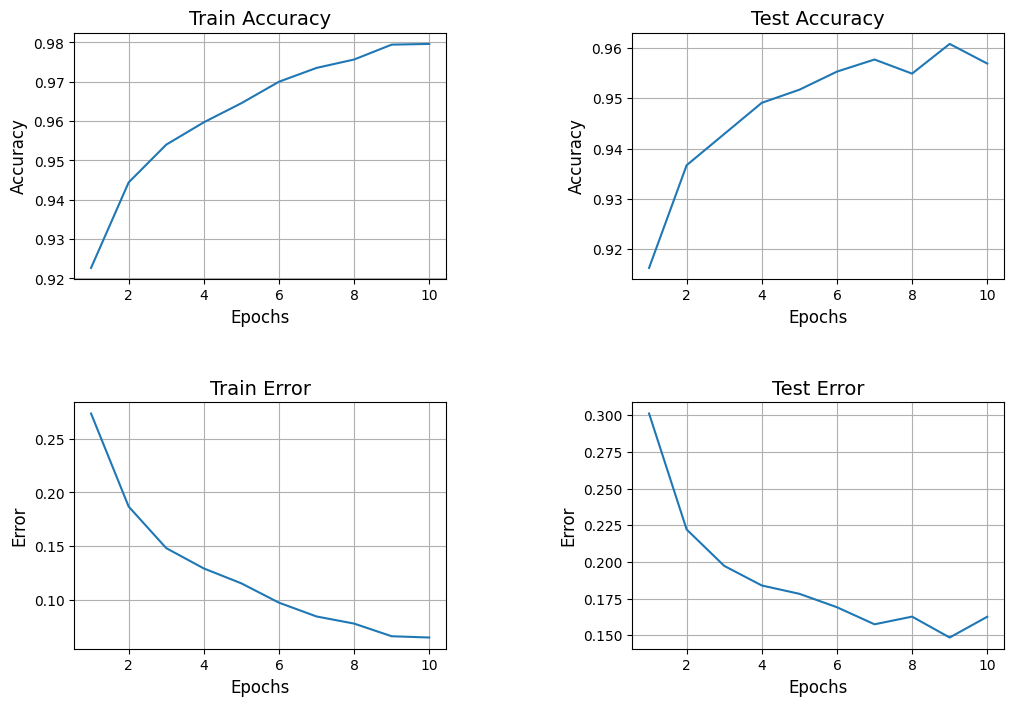

In [ ]:
fig, ax = plt.subplots(2,2, figsize=(12, 8))

plt.subplots_adjust(wspace=0.5, hspace=0.5)

ax[0,0].set_title('Train Accuracy', size=14)
ax[0,0].set_xlabel('Epochs', size=12)
ax[0,0].set_ylabel('Accuracy', size=12)
ax[0,1].set_title('Test Accuracy', size=14)
ax[0,1].set_xlabel('Epochs', size=12)
ax[0,1].set_ylabel('Accuracy', size=12)
ax[1,0].set_title('Train Error', size=14)
ax[1,0].set_xlabel('Epochs', size=12)
ax[1,0].set_ylabel('Error', size=12)
ax[1,1].set_title('Test Error', size=14)
ax[1,1].set_xlabel('Epochs', size=12)
ax[1,1].set_ylabel('Error', size=12)

ax[0,0].plot(range(1, len(train_accuracy_hist[:10])+1), train_accuracy_hist[:10])
ax[0,1].plot(range(1, len(train_accuracy_hist[:10])+1), test_accuracy_hist[:10])
ax[1,0].plot(range(1, len(train_accuracy_hist[:10])+1), train_error_hist[:10])
ax[1,1].plot(range(1, len(train_accuracy_hist[:10])+1), test_error_hist[:10])
ax[0,0].grid()
ax[0,1].grid()
ax[1,0].grid()
ax[1,1].grid()